In [202]:
import torch as th
from matplotlib import pyplot as plt
from IPython import display
th.__version__

'1.12.1+cu102'

#### Data (Preparing and Loading)

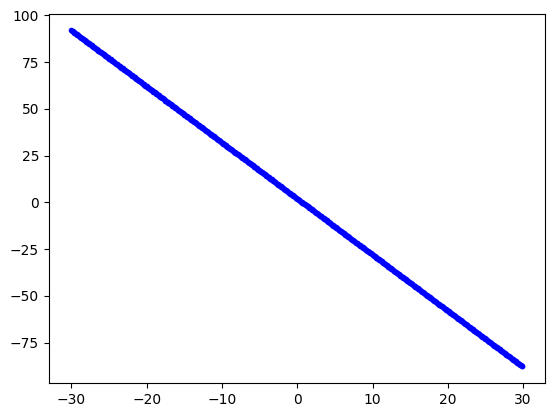

In [203]:
# Create liner data
x = th.arange(-30, 30, 0.1).view(-1, 1)
y = -3 * x + 2 + th.randn(x.size()) * 0.05
plt.plot(x.numpy(), y.numpy(), 'b.')


In [204]:
#  Create train-test data
th.manual_seed(1)
shuffle_indices = th.randperm(x.shape[0])
train_size = int(0.8 * x.shape[0])

x_train = x[shuffle_indices[:train_size]]
y_train = y[shuffle_indices[:train_size]]

x_test = x[shuffle_indices[train_size:]]
y_test = y[shuffle_indices[train_size:]]


print(x_train.shape), print(y_train.shape), print(x_test.shape), print(y_test.shape)

torch.Size([480, 1])
torch.Size([480, 1])
torch.Size([120, 1])
torch.Size([120, 1])


(None, None, None, None)

#### Build Model

In [229]:
#  Create regression model in pytorch with nn.parameters()
class LinearRegression(th.nn.Module):

    def __init__(self, input_size:int, output_size:int):
        super(LinearRegression, self).__init__()

        # initialize weights and bias as a trainable parameters
        self.weights = th.nn.Parameter(th.randn(input_size, output_size, dtype= th.float,), requires_grad=True)
        self.bias = th.nn.Parameter(th.randn(output_size, dtype=th.float), requires_grad=True)
    
    def forward(self, x) -> th.Tensor:
        # forward pass
        output = th.mm(x, self.weights) + self.bias
        return output

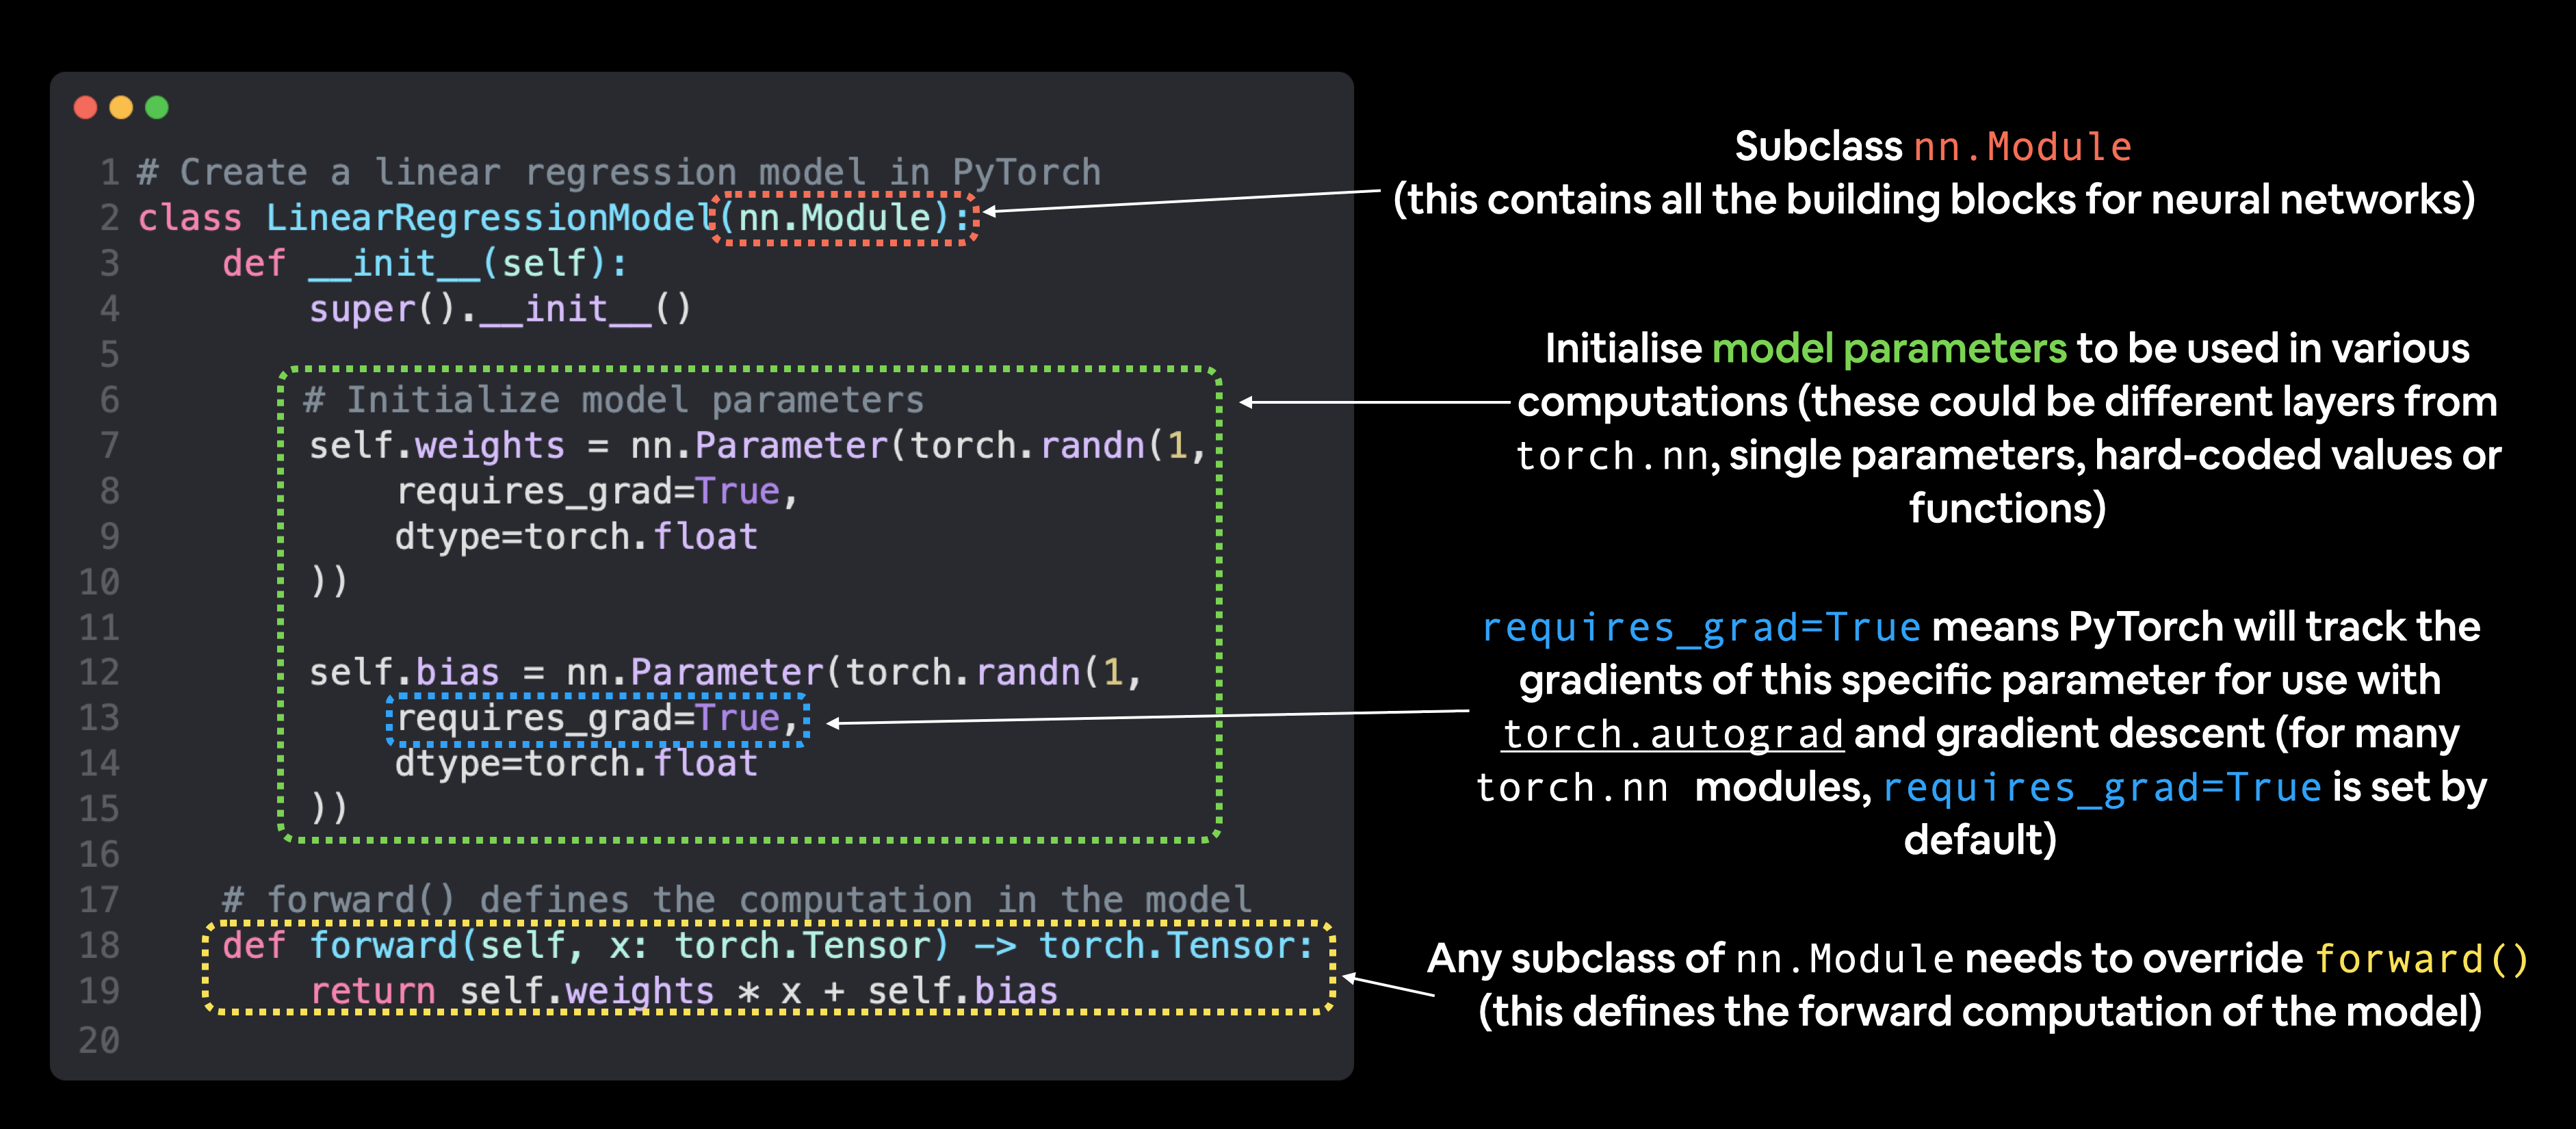

In [206]:
# Show the image
image_url = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-linear-model-annotated.png"
display.Image(image_url, width=800, height=600)

#### Checking The Contents of a PyTorch Model

In [230]:
# Set the manual seed
th.manual_seed(1)

# Create an instance of the model
model = LinearRegression(input_size=1, output_size=1)

# List the model parameters
print(list(model.parameters()))

# List the named parameters
print(model.state_dict())

[Parameter containing:
tensor([[0.6614]], requires_grad=True), Parameter containing:
tensor([0.2669], requires_grad=True)]
OrderedDict([('weights', tensor([[0.6614]])), ('bias', tensor([0.2669]))])


#### Making Predictions Using torch.inference_mode()

In [231]:
# Make prediction with the model
with th.inference_mode():
    y_preds = model(x_test)

Number of testing samples: 120
Number of predictions made: 120
Predicted values:
tensor([[  2.4494],
        [  8.8645],
        [ 12.3697],
        [ -0.4606],
        [-12.3649],
        [ -5.8175],
        [-16.5976],
        [-17.9864],
        [ -4.5609],
        [  1.3251],
        [  5.9546],
        [  7.6079],
        [ -6.5450],
        [-17.2589],
        [  1.5235],
        [ -9.7195],
        [-17.5234],
        [-12.0342],
        [-10.6454],
        [ -2.5108],
        [ 18.5202],
        [ -8.0000],
        [ 17.2637],
        [ -6.4127],
        [-19.3752],
        [ 10.3195],
        [  9.5920],
        [  7.7402],
        [ 13.4940],
        [  1.9203],
        [ 14.0230],
        [ -3.2382],
        [  0.0685],
        [ -0.5267],
        [ -7.1402],
        [ 15.8087],
        [ 11.7083],
        [ -6.8095],
        [ 15.4119],
        [ -7.7354],
        [ 10.7163],
        [  0.3992],
        [ -3.1060],
        [-18.1187],
        [ 18.5864],
        [  9.5259],

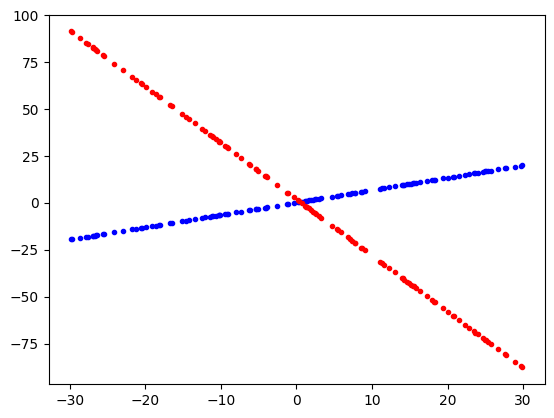

In [232]:
# Check the predictions
print(f"Number of testing samples: {len(x_test)}") 
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

plt.plot(x_test.numpy(), y_preds.numpy(), 'b.')
plt.plot(x_test.numpy(), y_test.numpy(), 'r.')

#### Train Model

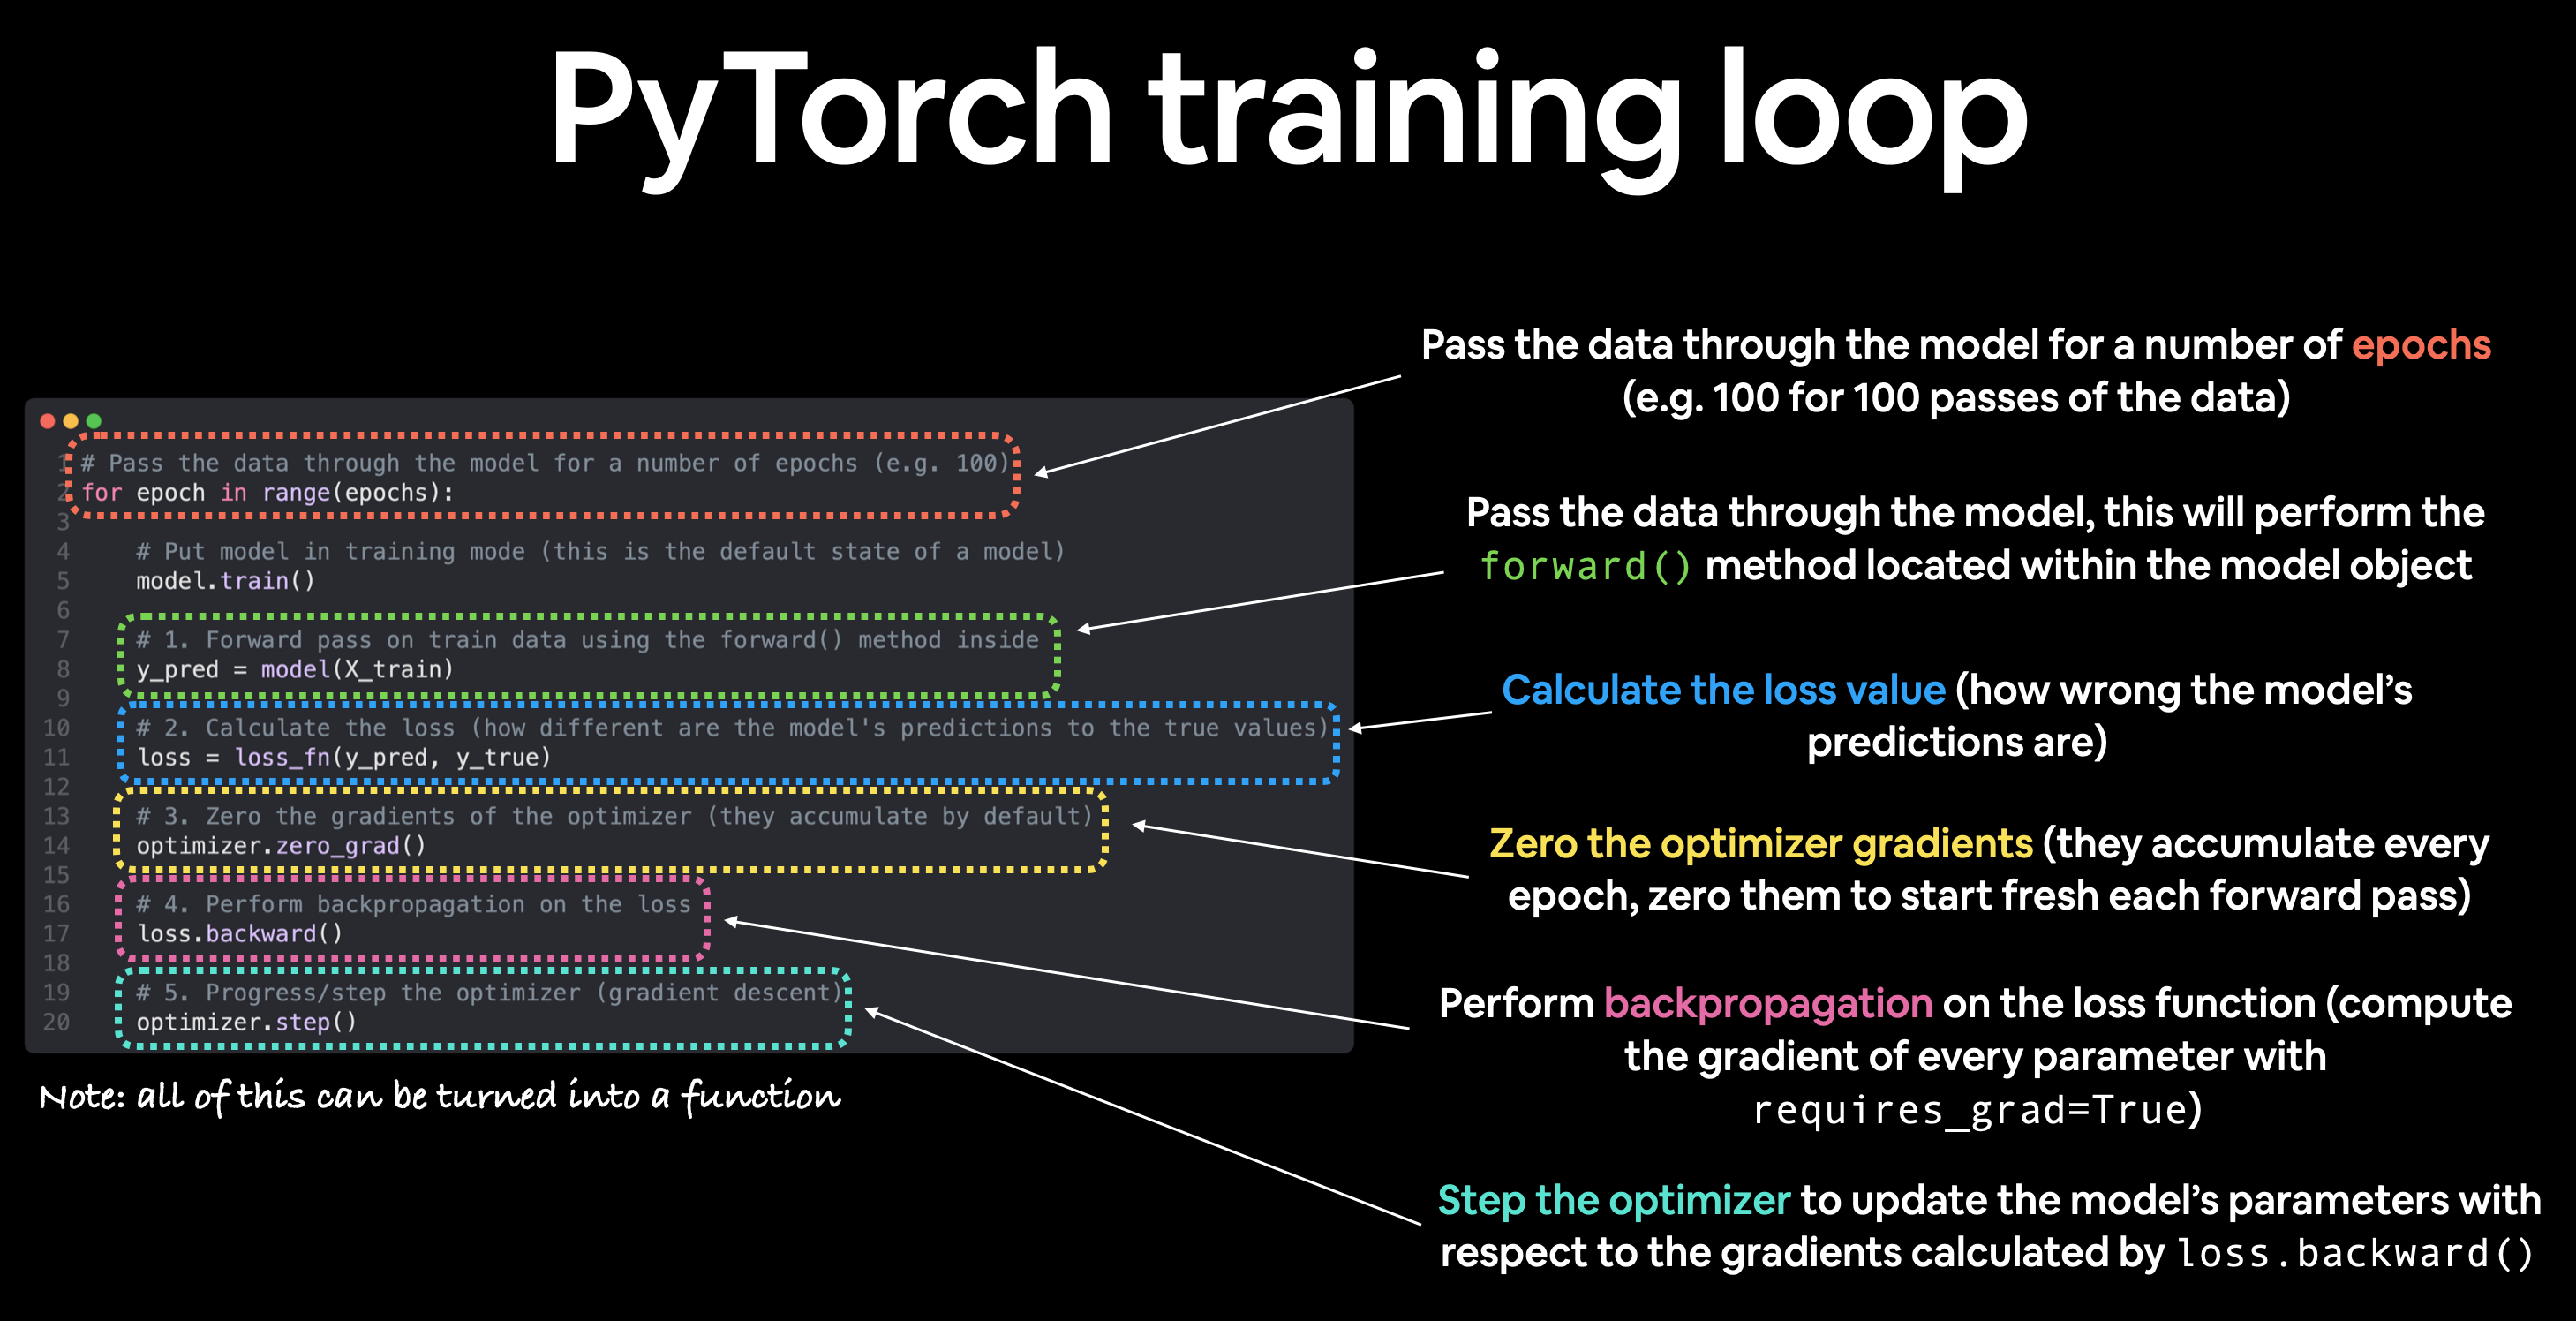

In [210]:
# Show the image
image_url = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-training-loop-annotated.png"
display.Image(image_url, width=800, height=600)

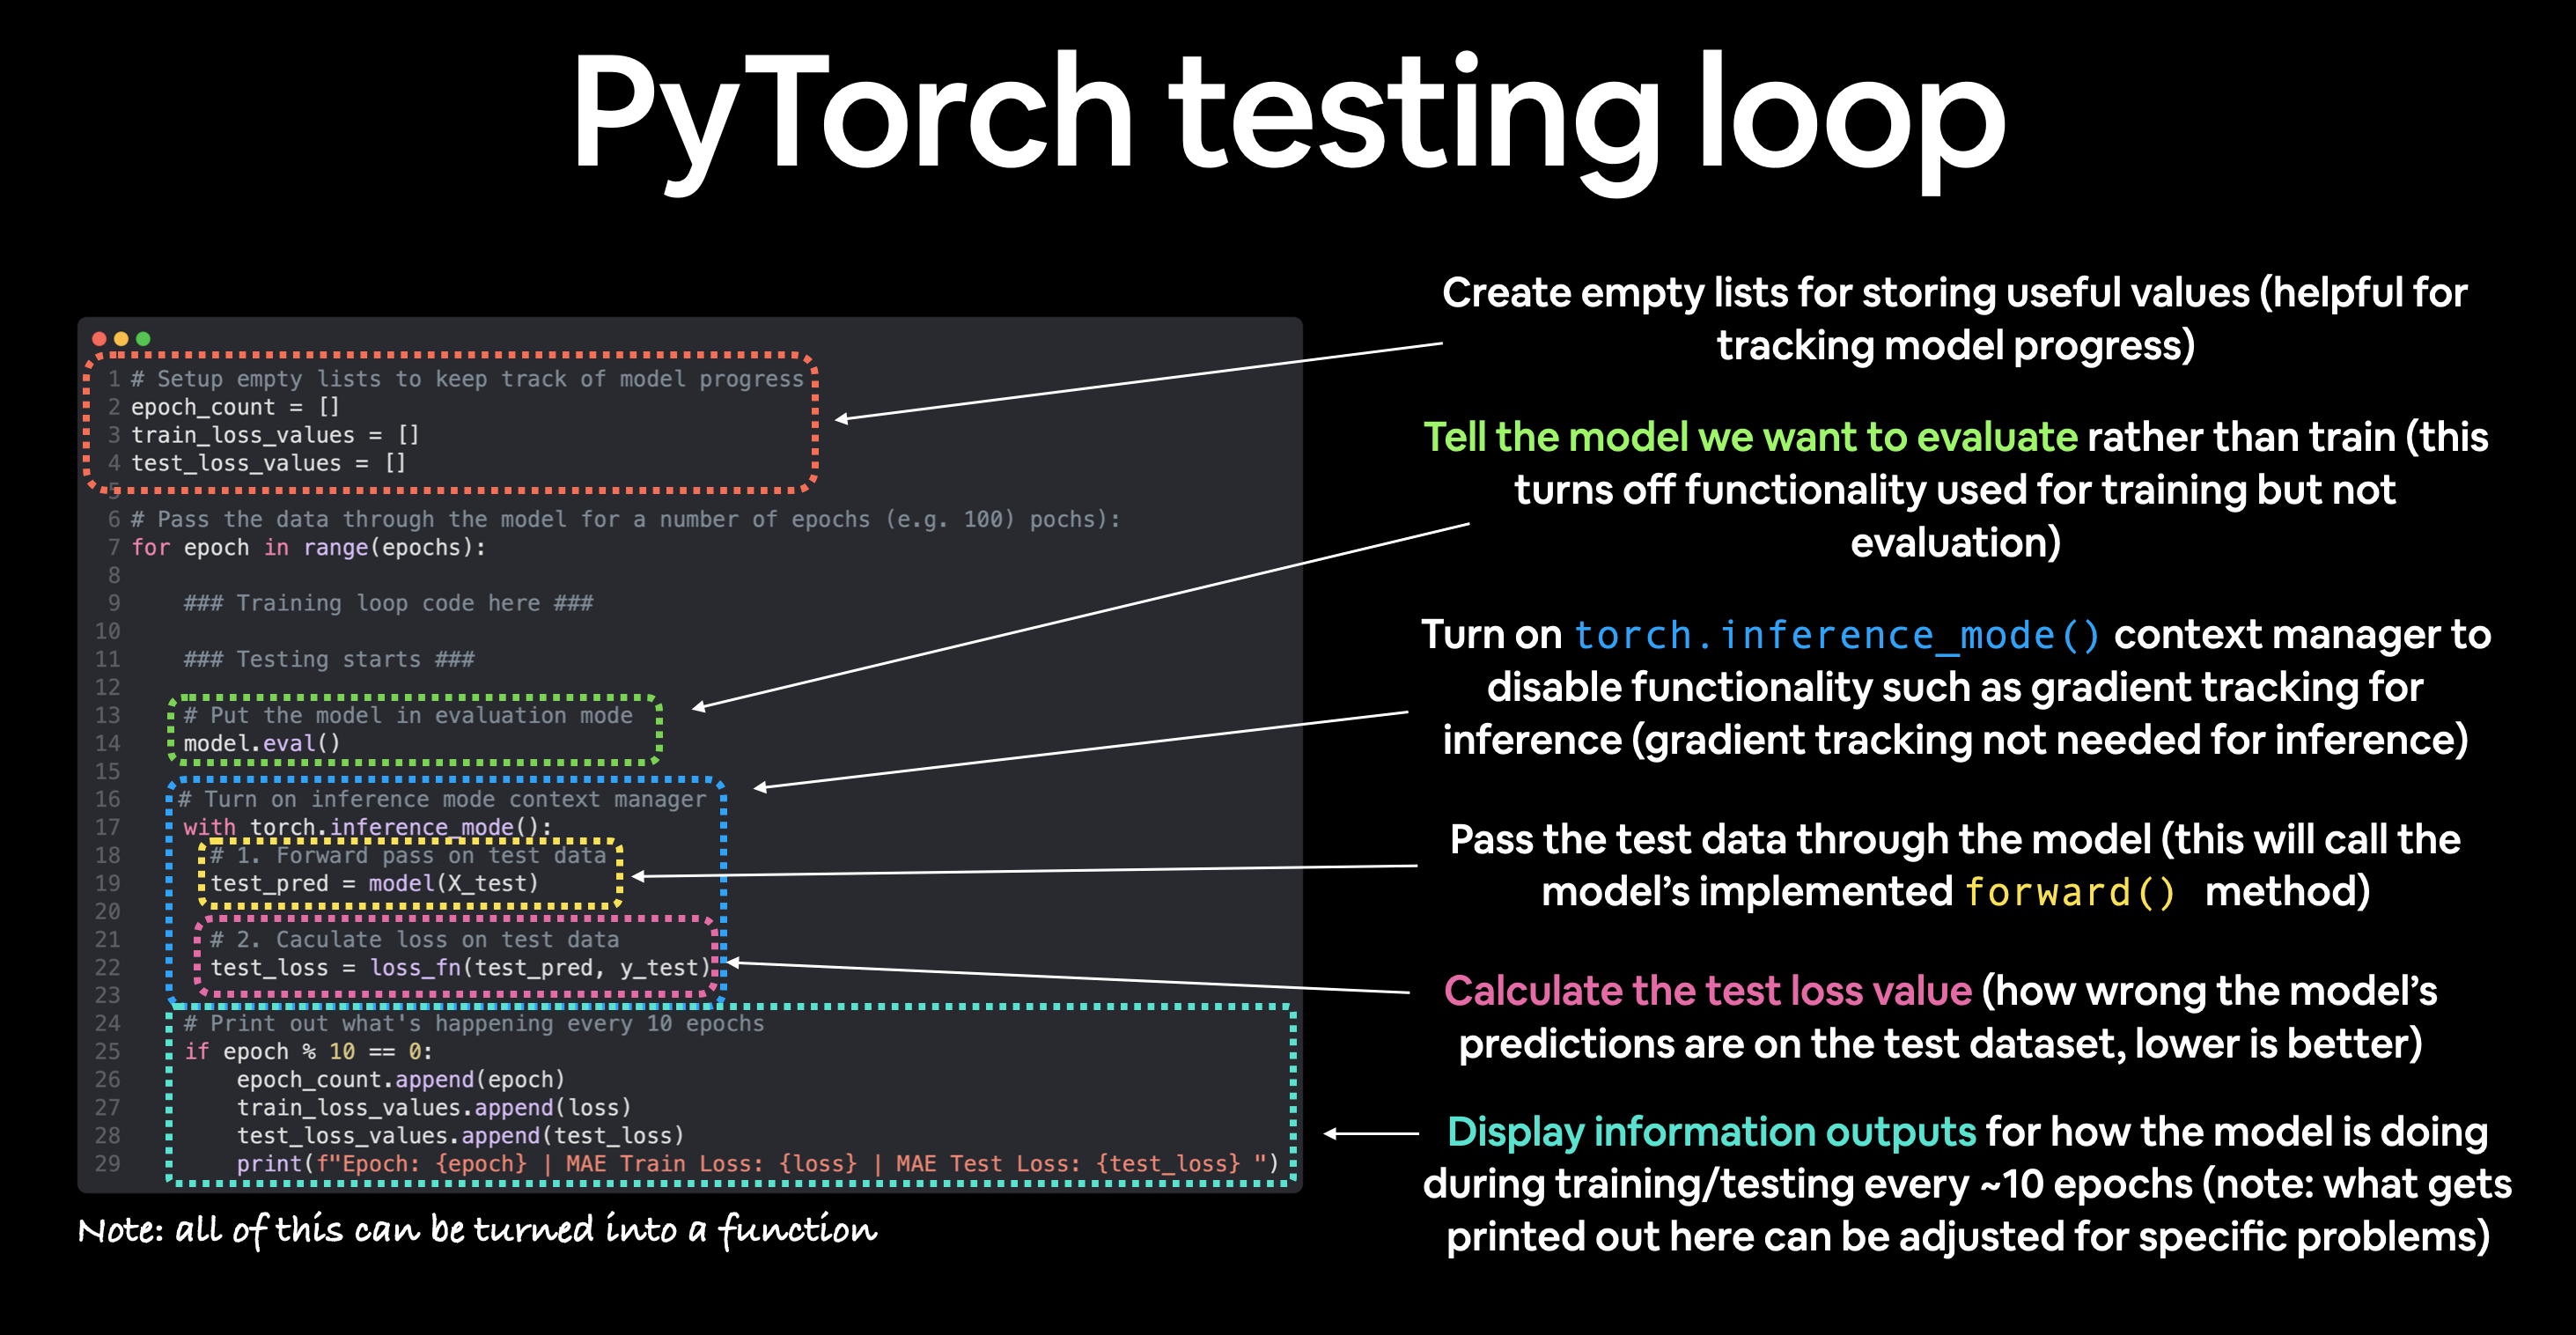

In [211]:
# Show the image
image_url = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-testing-loop-annotated.png"
display.Image(image_url, width=800, height=600)

##### Creating an Optimization Loop in PyTorch

In [233]:
#  Create an instance of the model
model = LinearRegression(input_size=1, output_size=1)

# Create the loss function
loss_fn = th.nn.MSELoss()

# Create an optimizer
optimizer = th.optim.SGD(params = model.parameters(), lr=0.001)


In [234]:
# Train the model
def train_model(model, x_train, y_train, x_test, y_test, loss_fn, optimizer, epochs=100):
    """
    Trains a model for a number of epochs, prints out the loss and plots the predictions.
    """

    # Create a list to store the train losses
    train_losses = []

    #  Create a list to store the test losses
    test_losses = []

    # Create a list to store the predictions
    predictions = []

    # Create a list to store the epoch counts
    epoch_count = []


    # Train the model for a number of epochs
    for epoch in range(epochs):

        # Set the model for training
        model.train()

        # Make predictions
        y_train_preds = model(x_train)

        # Calculate the loss
        train_loss = loss_fn(y_train_preds, y_train)

        # Append the loss to the losses list
        train_losses.append(train_loss)

        # Reset the gradients
        optimizer.zero_grad()

        # Calculate the gradients
        train_loss.backward()

        # Update the parameters
        optimizer.step()


        # Set the model for evaluation
        model.eval()
        
        # Make predictions with the model
        with th.inference_mode():
            y_test_preds = model(x_test)

            # Append the predictions to the predictions list
            predictions.append(y_preds)

            test_loss = loss_fn(y_test_preds, y_test)

        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_losses.append(train_loss.detach().numpy())
            test_losses.append(test_loss.detach().numpy())

            print(f"Epoch: {epoch} | MSE Train Loss: {train_loss} | MSE Test Loss: {test_loss} ")


    return train_losses, test_losses, predictions, epoch_count

In [235]:
train_losses, test_losses, predictions, epoch_count = train_model(model, x_train, y_train, x_test, y_test, loss_fn, optimizer, epochs=1000)

Epoch: 0 | MSE Train Loss: 2845.741943359375 | MSE Test Loss: 416.8832702636719 
Epoch: 10 | MSE Train Loss: 1.82793390750885 | MSE Test Loss: 1.8059889078140259 
Epoch: 20 | MSE Train Loss: 1.7562719583511353 | MSE Test Loss: 1.7351226806640625 
Epoch: 30 | MSE Train Loss: 1.6874467134475708 | MSE Test Loss: 1.6668145656585693 
Epoch: 40 | MSE Train Loss: 1.6213223934173584 | MSE Test Loss: 1.6011971235275269 
Epoch: 50 | MSE Train Loss: 1.5577906370162964 | MSE Test Loss: 1.5381613969802856 
Epoch: 60 | MSE Train Loss: 1.4967564344406128 | MSE Test Loss: 1.4776051044464111 
Epoch: 70 | MSE Train Loss: 1.4381130933761597 | MSE Test Loss: 1.419432520866394 
Epoch: 80 | MSE Train Loss: 1.381771445274353 | MSE Test Loss: 1.3635448217391968 
Epoch: 90 | MSE Train Loss: 1.3276420831680298 | MSE Test Loss: 1.3098620176315308 
Epoch: 100 | MSE Train Loss: 1.2756391763687134 | MSE Test Loss: 1.2582846879959106 
Epoch: 110 | MSE Train Loss: 1.225674033164978 | MSE Test Loss: 1.2087410688400269

In [237]:
# # Plot the losses
# plt.plot(epoch_count, train_losses, 'b.')
# plt.plot(epoch_count, test_losses, 'r.')
# plt.legend(['Train Loss', 'Test Loss'])
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.show()

#### Making Predictions with a Trained PyTorch Model (Inference)

In [238]:
#  Set the model for evaluation
model.eval()

# Make predictions with the model
with th.inference_mode():
    y_test_preds = model(x_test)

print(f"Number of testing samples: {len(x_test)}")
print(f"Number of predictions made: {len(y_test_preds)}")
print(f"Predicted values:\n{y_test_preds}")

Number of testing samples: 120
Number of predictions made: 120
Predicted values:
tensor([[ -8.0851],
        [-37.1873],
        [-53.0886],
        [  5.1160],
        [ 59.1202],
        [ 29.4179],
        [ 78.3217],
        [ 84.6222],
        [ 23.7174],
        [ -2.9847],
        [-23.9863],
        [-31.4869],
        [ 32.7181],
        [ 81.3219],
        [ -3.8847],
        [ 47.1193],
        [ 82.5220],
        [ 57.6201],
        [ 51.3196],
        [ 14.4167],
        [-80.9908],
        [ 39.3186],
        [-75.2903],
        [ 32.1181],
        [ 90.9227],
        [-43.7878],
        [-40.4876],
        [-32.0869],
        [-58.1890],
        [ -5.6849],
        [-60.5892],
        [ 17.7170],
        [  2.7158],
        [  5.4160],
        [ 35.4183],
        [-68.6898],
        [-50.0883],
        [ 33.9182],
        [-66.8896],
        [ 38.1185],
        [-45.5880],
        [  1.2157],
        [ 17.1169],
        [ 85.2222],
        [-81.2908],
        [-40.1876],

#### Saving and Loading a PyTorch Model

In [239]:
from pathlib import Path

# Create a directory to save the models
model_dir = "./models"
Path(model_dir).mkdir(parents=True, exist_ok=True)

#  Create model save path
model_name = "linear_regression_model.pt"
model_path = f"{model_dir}/{model_name}"

# Save the model
th.save(model.state_dict(), f=model_path)


##### Loading a Saved PyTorch Model's state_dict()

In [240]:
loaded_model = LinearRegression(input_size=1, output_size=1)
loaded_model.load_state_dict(th.load(f=model_path))

<All keys matched successfully>

In [241]:
# Set the model for evaluation
loaded_model.eval()

# Make predictions with the model
with th.inference_mode():
    y_test_preds = loaded_model(x_test)

print(f"Number of testing samples: {len(x_test)}")
print(f"Number of predictions made: {len(y_test_preds)}")
print(f"Predicted values:\n{y_test_preds}")

Number of testing samples: 120
Number of predictions made: 120
Predicted values:
tensor([[ -8.0851],
        [-37.1873],
        [-53.0886],
        [  5.1160],
        [ 59.1202],
        [ 29.4179],
        [ 78.3217],
        [ 84.6222],
        [ 23.7174],
        [ -2.9847],
        [-23.9863],
        [-31.4869],
        [ 32.7181],
        [ 81.3219],
        [ -3.8847],
        [ 47.1193],
        [ 82.5220],
        [ 57.6201],
        [ 51.3196],
        [ 14.4167],
        [-80.9908],
        [ 39.3186],
        [-75.2903],
        [ 32.1181],
        [ 90.9227],
        [-43.7878],
        [-40.4876],
        [-32.0869],
        [-58.1890],
        [ -5.6849],
        [-60.5892],
        [ 17.7170],
        [  2.7158],
        [  5.4160],
        [ 35.4183],
        [-68.6898],
        [-50.0883],
        [ 33.9182],
        [-66.8896],
        [ 38.1185],
        [-45.5880],
        [  1.2157],
        [ 17.1169],
        [ 85.2222],
        [-81.2908],
        [-40.1876],

#### Make the model with nn.Linear

In [252]:
#  Create liner regression model with nn.Linear module
class LinearRegressionModule(th.nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegressionModule, self).__init__()
        self.linear = th.nn.Linear(input_size, output_size)
    
    def forward(self, x) -> th.Tensor:
        # forward pass
        output = self.linear(x)
        return output

In [253]:
linear_model = LinearRegressionModule(input_size=1, output_size=1)
print(linear_model.parameters().__class__)
print(list(linear_model.parameters()))
print(linear_model.state_dict())

<class 'generator'>
[Parameter containing:
tensor([[-0.3724]], requires_grad=True), Parameter containing:
tensor([-0.6040], requires_grad=True)]
OrderedDict([('linear.weight', tensor([[-0.3724]])), ('linear.bias', tensor([-0.6040]))])


#### Training

In [254]:
# Create an instance of the model
linear_model = LinearRegressionModule(input_size=1, output_size=1)

#  Create loss function
loss_fn = th.nn.MSELoss()

# Create an optimizer
optimizer = th.optim.SGD(params = linear_model.parameters(), lr=0.001)

In [255]:
train_losses, test_losses, predictions, epoch_count = train_model(linear_model, x_train, y_train, x_test, y_test, loss_fn, optimizer, epochs=1000)

Epoch: 0 | MSE Train Loss: 2441.13916015625 | MSE Test Loss: 359.2046813964844 
Epoch: 10 | MSE Train Loss: 5.681031227111816 | MSE Test Loss: 5.63510799407959 
Epoch: 20 | MSE Train Loss: 5.458159923553467 | MSE Test Loss: 5.413858890533447 
Epoch: 30 | MSE Train Loss: 5.244063377380371 | MSE Test Loss: 5.200953483581543 
Epoch: 40 | MSE Train Loss: 5.038360595703125 | MSE Test Loss: 4.996407985687256 
Epoch: 50 | MSE Train Loss: 4.840731620788574 | MSE Test Loss: 4.799899578094482 
Epoch: 60 | MSE Train Loss: 4.650864124298096 | MSE Test Loss: 4.611108779907227 
Epoch: 70 | MSE Train Loss: 4.468451023101807 | MSE Test Loss: 4.429748058319092 
Epoch: 80 | MSE Train Loss: 4.293187618255615 | MSE Test Loss: 4.2555084228515625 
Epoch: 90 | MSE Train Loss: 4.124804973602295 | MSE Test Loss: 4.088113784790039 
Epoch: 100 | MSE Train Loss: 3.9630239009857178 | MSE Test Loss: 3.927300214767456 
Epoch: 110 | MSE Train Loss: 3.807596445083618 | MSE Test Loss: 3.7728142738342285 
Epoch: 120 | M

In [257]:
# Find our model's learned parameters
from pprint import pprint

pprint(f"Model's state_dict: {linear_model.state_dict()}")
pprint(f"Model's parameters: {list(linear_model.parameters())}")


("Model's state_dict: OrderedDict([('linear.weight', tensor([[-3.0003]])), "
 "('linear.bias', tensor([1.6735]))])")
("Model's parameters: [Parameter containing:\n"
 'tensor([[-3.0003]], requires_grad=True), Parameter containing:\n'
 'tensor([1.6735], requires_grad=True)]')


#### Making Predictions

In [260]:
# Set the model for evaluation
linear_model.eval()

# Make predictions with the model
with th.inference_mode():
    y_test_preds = linear_model(x_test)

print(f"Number of testing samples: {len(x_test)}")
print(f"Number of predictions made: {len(y_test_preds)}")
print(f"Predicted values:\n{y_test_preds}")


Number of testing samples: 120
Number of predictions made: 120
Predicted values:
tensor([[ -8.2276],
        [-37.3309],
        [-53.2326],
        [  4.9738],
        [ 58.9798],
        [ 29.2765],
        [ 78.1820],
        [ 84.4827],
        [ 23.5759],
        [ -3.1271],
        [-24.1294],
        [-31.6302],
        [ 32.5769],
        [ 81.1823],
        [ -4.0272],
        [ 46.9785],
        [ 82.3824],
        [ 57.4797],
        [ 51.1790],
        [ 14.2749],
        [-81.1357],
        [ 39.1776],
        [-75.4351],
        [ 31.9768],
        [ 90.7834],
        [-43.9316],
        [-40.6312],
        [-32.2303],
        [-58.3332],
        [ -5.8274],
        [-60.7334],
        [ 17.5752],
        [  2.5736],
        [  5.2739],
        [ 35.2772],
        [-68.8344],
        [-50.2323],
        [ 33.7770],
        [-67.0341],
        [ 37.9775],
        [-45.7318],
        [  1.0734],
        [ 16.9752],
        [ 85.0827],
        [-81.4358],
        [-40.3312],

#### Saving and Loading a Model

In [261]:
# Create a directory to save the models
model_dir = "./models"
Path(model_dir).mkdir(parents=True, exist_ok=True)

#  Create model save path
model_name = "linear_regression_module_model.pt"
model_path = f"{model_dir}/{model_name}"

# Save the model
th.save(linear_model.state_dict(), f=model_path)

In [262]:
loaded_linear_model = LinearRegressionModule(input_size=1, output_size=1)
loaded_linear_model.load_state_dict(th.load(f=model_path))

# Set the model for evaluation
loaded_linear_model.eval()

# Make predictions with the model
with th.inference_mode():
    y_test_preds = loaded_linear_model(x_test)

print(f"Number of testing samples: {len(x_test)}")
print(f"Number of predictions made: {len(y_test_preds)}")
print(f"Predicted values:\n{y_test_preds}")

Number of testing samples: 120
Number of predictions made: 120
Predicted values:
tensor([[ -8.2276],
        [-37.3309],
        [-53.2326],
        [  4.9738],
        [ 58.9798],
        [ 29.2765],
        [ 78.1820],
        [ 84.4827],
        [ 23.5759],
        [ -3.1271],
        [-24.1294],
        [-31.6302],
        [ 32.5769],
        [ 81.1823],
        [ -4.0272],
        [ 46.9785],
        [ 82.3824],
        [ 57.4797],
        [ 51.1790],
        [ 14.2749],
        [-81.1357],
        [ 39.1776],
        [-75.4351],
        [ 31.9768],
        [ 90.7834],
        [-43.9316],
        [-40.6312],
        [-32.2303],
        [-58.3332],
        [ -5.8274],
        [-60.7334],
        [ 17.5752],
        [  2.5736],
        [  5.2739],
        [ 35.2772],
        [-68.8344],
        [-50.2323],
        [ 33.7770],
        [-67.0341],
        [ 37.9775],
        [-45.7318],
        [  1.0734],
        [ 16.9752],
        [ 85.0827],
        [-81.4358],
        [-40.3312],